In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import re
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
def Constant_Features(x_train, x_test,threshold=0):
  """
  Removing Constant Features using Variance Threshold
  Input: threshold parameter to identify the variable as constant
         train data (pd.Dataframe) 
         test data (pd.Dataframe)
  Output: train data, test data after applying filter methods
  """
  # import and create the VarianceThreshold object.
  from sklearn.feature_selection import VarianceThreshold
  vs_constant = VarianceThreshold(threshold)

  # select the numerical columns only.
  numerical_x_train = x_train[x_train.select_dtypes([np.number]).columns]

  # fit the object to our data.
  vs_constant.fit(numerical_x_train)

  # get the constant colum names.
  constant_columns = [column for column in numerical_x_train.columns
                      if column not in numerical_x_train.columns[vs_constant.get_support()]]

  # detect constant categorical variables.
  constant_cat_columns = [column for column in x_train.columns 
                          if (x_train[column].dtype == "O" and len(x_train[column].unique())  == 1 )]

  # concatenating the two lists.
  all_constant_columns = constant_cat_columns + constant_columns
  
  return all_constant_columns


In [4]:
def Quansi_Constant_Feature(x_train, x_test,threshold=0.98):
  # create empty list
  quasi_constant_feature = []

  # loop over all the columns
  for feature in x_train.columns:
    # calculate the ratio.
    predominant = (x_train[feature].value_counts() / np.float(len(x_train))).sort_values(ascending=False).values[0]
    
    # append the column name if it is bigger than the threshold
    if predominant >= threshold:
        quasi_constant_feature.append(feature)   
  return quasi_constant_feature

In [5]:
def Dupplicate_Feature(x_train,x_test):
  # transpose the feature matrice
  train_features_T = x_train.T

  # print the number of duplicated features
  print(train_features_T.duplicated().sum())

  # select the duplicated features columns names
  duplicated_columns = train_features_T[train_features_T.duplicated()].index.values

  return duplicated_columns

In [6]:
def Correlated_Feature(x_train,x_test,threshold=0.8):
  # creating set to hold the correlated features
  corr_features = set()

  # create the correlation matrix (default to pearson)
  corr_matrix = x_train.corr()
  '''
  # optional: display a heatmap of the correlation matrix
  plt.figure(figsize=(11,11))
  sns.heatmap(corr_matrix)
  #'''

  for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)
  return corr_features

In [7]:
def Mutual_Information(x_train, x_test, select_k = 10):
  # import the required functions and object.
  from sklearn.feature_selection import mutual_info_classif
  from sklearn.feature_selection import SelectKBest

  # get only the numerical features.
  numerical_x_train = x_train[x_train.select_dtypes([np.number]).columns]


  # create the SelectKBest with the mutual info strategy.
  selection = SelectKBest(mutual_info_classif, k=select_k)
  selection.fit(numerical_x_train, y_train)

  # display the retained features.
  features = x_train.columns[selection.get_support()]
  return features

In [8]:
def Select_Model(x_train,y_train,x_test,y_test):
  from sklearn.feature_selection import SelectFromModel
  from sklearn.ensemble import RandomForestClassifier
  # define model
  rfc = RandomForestClassifier(n_estimators=100)
  # feature extraction
  select_model = SelectFromModel(rfc)
  # fit on train set
  fit = select_model.fit(x_train, y_train)
  # transform train set
  x_train = fit.transform(x_train)
  x_test = fit.transform(x_test)
  return x_train, x_test

In [9]:
def PCA_Feature(x_train,x_test):
  import numpy as np
  from sklearn.decomposition import PCA
  pca = PCA(n_components=2)
  pca.fit(x_train)
  x_train = pca.transform(x_train)

In [10]:
def RFE_Feature(x_train,y_train,x_test,y_test):
  from sklearn.feature_selection import RFE
  from sklearn.ensemble import RandomForestClassifier
  # define model
  rfc = RandomForestClassifier(n_estimators=100)
  rfe = RFE(estimator=rfc, n_features_to_select=3)
  # fit the model
  rfe.fit(x_train, y_train)
  #transform the data
  x_train, y_train = rfe.transform(x_train, y_train)
  x_test, y_test = rfe.transform(x_test, y_test)
  return x_train,y_train,x_test,y_test

In [11]:
def Drop_Columns(x_train,x_test,columns):
  x_train = x_train.drop(labels=columns, axis=1, inplace=True)
  x_test = x_test.drop(labels=columns, axis=1, inplace=True)
  return x_train, x_test

In [12]:
def RFCaccuracy(X_train,X_test,Y_train,Y_test):
  import time
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import accuracy_score
  start = time.time()
  clf = RandomForestClassifier()
  clf.fit(X_train,Y_train)
  Y_predict = clf.predict(X_test)
  score = accuracy_score(Y_test,Y_predict)
  end = time.time()
  print("Accuracy score for Random Forest Classifier: ", score)
  print("Time estimated: ",end-start)
  return score

In [13]:
path='/content/drive/My Drive/Datasets/Py4DS_Lab6/data.csv'
df = pd.read_csv(path)
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,

- Dropping features

In [14]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [15]:
df=df.drop(['Unnamed: 0','ID','Name','Photo','Flag','Club Logo','Joined'],axis = 1)
df=df.drop(['Loaned From','Contract Valid Until','Real Face'],axis = 1)
df

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,16,England,47,67,Cambridge United,€60K,€1K,1189,Right,1.0,3.0,2.0,Medium/ Medium,Normal,ST,33.0,5'8,148lbs,45+2,45+2,45+2,45+2,46+2,46+2,46+2,45+2,44+2,44+2,

In [16]:
df.select_dtypes(include=['object']).columns

Index(['Nationality', 'Club', 'Value', 'Wage', 'Preferred Foot', 'Work Rate',
       'Body Type', 'Position', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Release Clause'],
      dtype='object')

- Observation:
  + We have 3 price columns: Value, Wage, Release Clause
  + Price columns have 3 type of unit: M(Million) ,K(Thousand), 0(0 euro)

Value
[  252 11108  6847]
Wage
[  241 17966]
Release Clause
[7493 9150 1564]


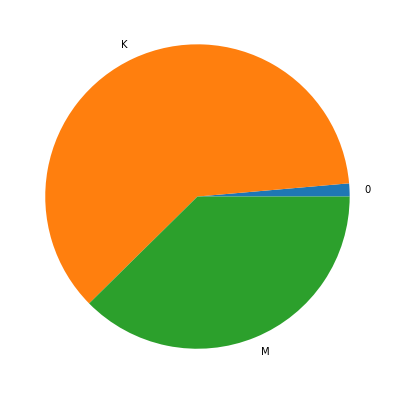

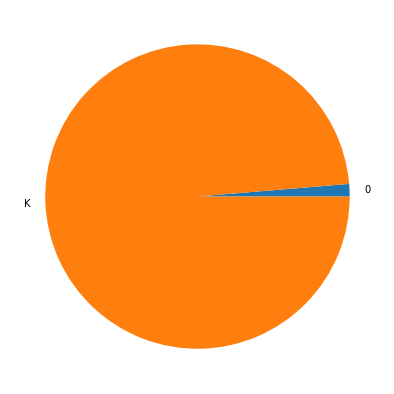

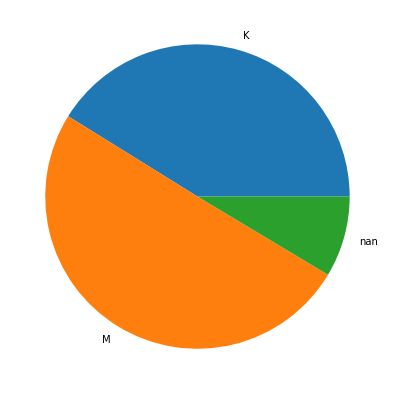

In [17]:

list_money = ['Value','Wage','Release Clause']
for col in list_money:
  print(col)
  unit = [str[len(str)-1] if (str==str) else str for str in df[col]]
  unique, count = np.unique(unit,return_counts=True)
  fig = plt.figure(figsize=(10,7))
  plt.pie(count,labels=unique)
  print(count)

In [18]:
for col in list_money:
  number = [s[1:len(s)-1] if (s==s) else s for s in df[col]]
  number = ['0' if (s=='') else s for s in number]
  number = np.array(number).astype(np.float)
  unit = [str[len(str)-1] if (str==str) else str for str in df[col]]
  for i in range(len(unit)):
    if (unit[i]=='M'):
      number[i] = number[i]*1000000
    elif (unit[i]=='K'):
      number[i] = number[i]*1000
  df[col] = number
  print(number)
  #'''
df

[1.105e+08 7.700e+07 1.185e+08 ... 6.000e+04 6.000e+04 6.000e+04]
[565000. 405000. 290000. ...   1000.   1000.   1000.]
[2.265e+08 1.271e+08 2.281e+08 ... 1.650e+05 1.430e+05 1.650e+05]


,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,England,47,65,Crewe Alexandra,60000.0,1000.0,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,19,Sweden,47,63,Trelleborgs FF,60000.0,1000.0,1098,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,16,England,47,67,Cambridge United,60000.0,1000.0,1189,Right,1.0,3.0,2.0,Medium

In [19]:
df.select_dtypes(include=['object']).columns

Index(['Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type',
       'Position', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF',
       'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB',
       'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'],
      dtype='object')

- Obsevation
  + Height columns has format 5'8
  + Weight columns has format 176lbs

In [20]:
number = [s.replace('\'','.') if (s==s) else s for s in df['Height']]
df['Height'] = np.array(number).astype(np.float)
df

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,5.70,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,6.20,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,5.90,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,6.40,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,5.11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,England,47,65,Crewe Alexandra,60000.0,1000.0,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,5.90,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,19,Sweden,47,63,Trelleborgs FF,60000.0,1000.0,1098,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,6.30,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,16,England,47,67,Cambridge United,60000.0,1000.0,1189,Right,1.0,3.0,2.0,

In [21]:
number = [s[0:len(s)-3] if (s==s) else s for s in df['Weight']]
df['Weight'] = np.array(number).astype(np.float)
df

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,5.70,159.0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,6.20,183.0,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,5.90,150.0,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,6.40,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,5.11,154.0,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,England,47,65,Crewe Alexandra,60000.0,1000.0,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,5.90,134.0,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,19,Sweden,47,63,Trelleborgs FF,60000.0,1000.0,1098,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,6.30,170.0,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,16,England,47,67,Cambridge United,60000.0,1000.0,1189,Right,1.0,3.0,2.0,Medium/

- Observation:
  + Some columns has format 34+2
- Decision:
  + Get number before add notation

In [22]:
list_position = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM',
       'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM',
       'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
for col in list_position:
  number = [re.findall('([0-9]+)\+',s)[0] if (s==s) else s for s in df[col]]
  df[col] = np.array(number).astype(np.float)
df

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,5.70,159.0,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,6.20,183.0,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,5.90,150.0,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,6.40,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,5.11,154.0,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,England,47,65,Crewe Alexandra,60000.0,1000.0,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,5.90,134.0,42.0,42.0,42.0,44.0,44.0,44.0,44.0,44.0,45.0,45.0,45.0,44.0,45.0,45.0,45.0,44.0,44.0,45.0,45.0,45.0,44.0,45.0,45.0,45.0,45.0,45.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,19,Sweden,47,63,Trelleborgs FF,60000.0,1000.0,1098,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,6.30,170.0,45.0,45.0,45.0,39.0,42.0,42.0,42.0,39.0,40.0,40.0,40.0,38.0,35.0,35.0,35.0,38.0,30.0,31.0,31.0,31.0,30.0,29.0,32.0,32.0,32.0,29.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,16,England,47,67,Cambridge United,60000.0,1000.0,1189,Right,1.0,3.0,2.0,Medium/

- Observation:
  + Work Rate has format Medium/ Medium or something like */* with * in Low, Medium or High
- Decision:
  + Split to Work Rate 1 and Work Rate2
  + Delete Work Rate columns

In [23]:
df.select_dtypes(include=['object']).columns

Index(['Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type',
       'Position'],
      dtype='object')

In [24]:
s = [re.findall('([A-Z][a-z]+)',s) if (s==s) else s for s in df['Work Rate']]
df['Work Rate 1'] = [s1[0] if (s1==s1) else s1 for s1 in s]
df['Work Rate 2'] = [s2[1] if (s2==s2) else s2 for s2 in s]
df = df.drop(['Work Rate'],axis=1)
df

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Work Rate 1,Work Rate 2
0,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Messi,RF,10.0,5.70,159.0,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,Medium,Medium
1,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,C. Ronaldo,ST,7.0,6.20,183.0,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,High,Low
2,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,Neymar,LW,10.0,5.90,150.0,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,High,Medium
3,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Lean,GK,1.0,6.40,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,Medium,Medium
4,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,Normal,RCM,7.0,5.11,154.0,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,England,47,65,Crewe Alexandra,60000.0,1000.0,1307,Right,1.0,2.0,2.0,Lean,CM,22.0,5.90,134.0,42.0,42.0,42.0,44.0,44.0,44.0,44.0,44.0,45.0,45.0,45.0,44.0,45.0,45.0,45.0,44.0,44.0,45.0,45.0,45.0,44.0,45.0,45.0,45.0,45.0,45.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0,Medium,Medium
18203,19,Sweden,47,63,Trelleborgs FF,60000.0,1000.0,1098,Right,1.0,2.0,2.0,Normal,ST,21.0,6.30,170.0,45.0,45.0,45.0,39.0,42.0,42.0,42.0,39.0,40.0,40.0,40.0,38.0,35.0,35.0,35.0,38.0,30.0,31.0,31.0,31.0,30.0,29.0,32.0,32.0,32.0,29.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0,Medium,Medium
18204,16,England,47,67,Cambridge United,60000.0,1000.0,1189,Right,1.0,3.0,

Nationality
Club
Preferred Foot
Body Type
Position
Work Rate 1
Work Rate 2


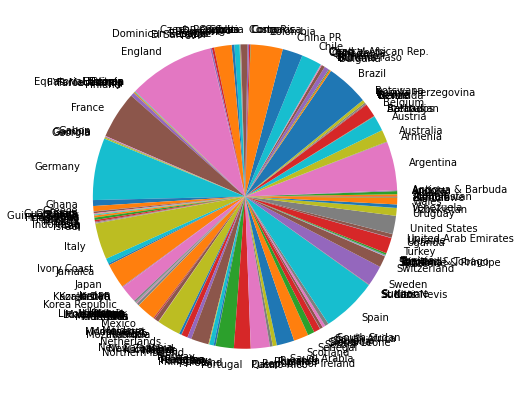

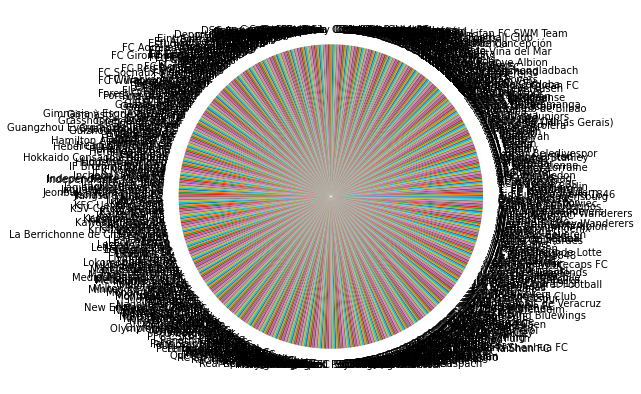

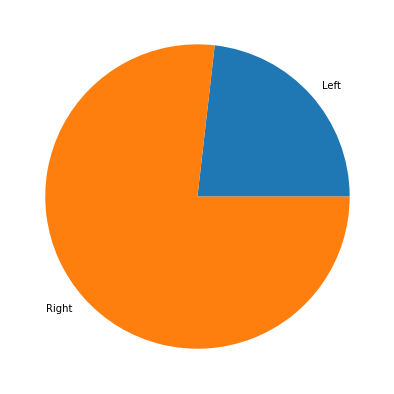

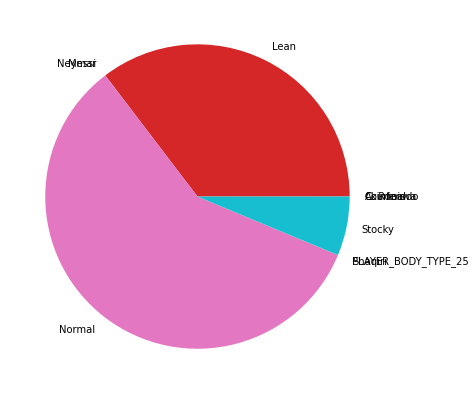

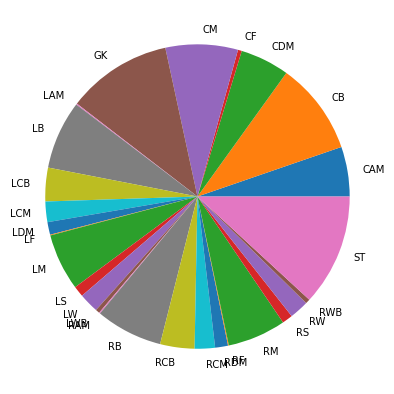

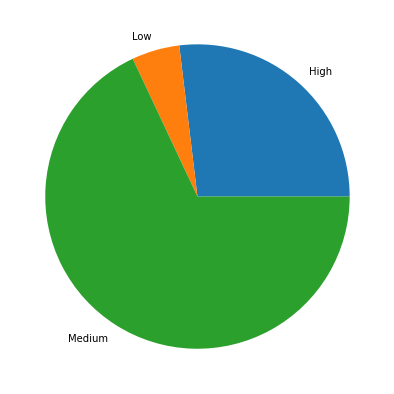

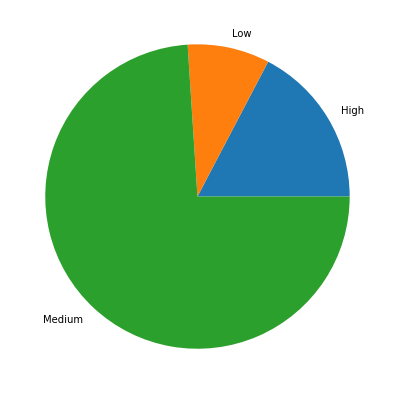

In [25]:
  list_category = df.select_dtypes(include=['object']).columns
  for col in list_category:
    df_not_nan = df[col][pd.notnull(df[col])]
    print(col)
    unique, count = np.unique(df_not_nan,return_counts=True)
    fig = plt.figure(figsize=(10,7))
    plt.pie(count,labels=unique)

In [26]:
df['Body Type'] = [s if (s in ['Lean','Normal','Stocky']) else 'Other'for s in df['Body Type']]
df

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Work Rate 1,Work Rate 2
0,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Other,RF,10.0,5.70,159.0,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,Medium,Medium
1,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,Other,ST,7.0,6.20,183.0,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,High,Low
2,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,Other,LW,10.0,5.90,150.0,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,High,Medium
3,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Lean,GK,1.0,6.40,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,Medium,Medium
4,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,Normal,RCM,7.0,5.11,154.0,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,England,47,65,Crewe Alexandra,60000.0,1000.0,1307,Right,1.0,2.0,2.0,Lean,CM,22.0,5.90,134.0,42.0,42.0,42.0,44.0,44.0,44.0,44.0,44.0,45.0,45.0,45.0,44.0,45.0,45.0,45.0,44.0,44.0,45.0,45.0,45.0,44.0,45.0,45.0,45.0,45.0,45.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0,Medium,Medium
18203,19,Sweden,47,63,Trelleborgs FF,60000.0,1000.0,1098,Right,1.0,2.0,2.0,Normal,ST,21.0,6.30,170.0,45.0,45.0,45.0,39.0,42.0,42.0,42.0,39.0,40.0,40.0,40.0,38.0,35.0,35.0,35.0,38.0,30.0,31.0,31.0,31.0,30.0,29.0,32.0,32.0,32.0,29.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0,Medium,Medium
18204,16,England,47,67,Cambridge United,60000.0,1000.0,1189,Right,1.0,3.0,2.0,No

- Feature Engineering

In [27]:
df.shape

(18207, 80)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 80 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  int64  
 1   Nationality               18207 non-null  object 
 2   Overall                   18207 non-null  int64  
 3   Potential                 18207 non-null  int64  
 4   Club                      17966 non-null  object 
 5   Value                     18207 non-null  float64
 6   Wage                      18207 non-null  float64
 7   Special                   18207 non-null  int64  
 8   Preferred Foot            18159 non-null  object 
 9   International Reputation  18159 non-null  float64
 10  Weak Foot                 18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Body Type                 18207 non-null  object 
 13  Position                  18147 non-null  object 
 14  Jersey

In [29]:
list_onehot = ['Preferred Foot','Work Rate 1','Work Rate 2','Body Type']
df = pd.get_dummies(df,columns = list_onehot)
df

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,...,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Preferred Foot_Left,Preferred Foot_Right,Work Rate 1_High,Work Rate 1_Low,Work Rate 1_Medium,Work Rate 2_High,Work Rate 2_Low,Work Rate 2_Medium,Body Type_Lean,Body Type_Normal,Body Type_Other,Body Type_Stocky
0,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,5.0,4.0,4.0,RF,10.0,5.70,159.0,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,...,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,1,0,0,0,1,0,0,1,0,0,1,0
1,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,5.0,4.0,5.0,ST,7.0,6.20,183.0,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,...,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,0,1,1,0,0,0,1,0,0,0,1,0
2,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,5.0,5.0,5.0,LW,10.0,5.90,150.0,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,...,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,0,1,1,0,0,0,0,1,0,0,1,0
3,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,4.0,3.0,1.0,GK,1.0,6.40,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,0,1,0,0,1,0,0,1,1,0,0,0
4,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,4.0,5.0,4.0,RCM,7.0,5.11,154.0,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,...,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,0,1,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,England,47,65,Crewe Alexandra,60000.0,1000.0,1307,1.0,2.0,2.0,CM,22.0,5.90,134.0,42.0,42.0,42.0,44.0,44.0,44.0,44.0,44.0,45.0,45.0,45.0,44.0,45.0,45.0,45.0,44.0,44.0,45.0,45.0,45.0,44.0,45.0,45.0,45.0,45.0,...,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0,0,1,0,0,1,0,0,1,1,0,0,0
18203,19,Sweden,47,63,Trelleborgs FF,60000.0,1000.0,1098,1.0,2.0,2.0,ST,21.0,6.30,170.0,45.0,45.0,45.0,39.0,42.0,42.0,42.0,39.0,40.0,40.0,40.0,38.0,35.0,35.0,35.0,38.0,30.0,31.0,31.0,31.0,30.0,29.0,32.0,32.0,32.0,...,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0,0,1,0,0,1,0,0,1,0,1,0,0
18204,16,England,47,67,Cambridge United,60000.0,1000.0,1189,1.0,3.0,2.0,ST,33.0,5.80,148.0,45.0,45.0,45.0,45.0,46.0,46.0,46.0,45.0,44.0,44.0,44.0,44.0,38.0,38.0,38.0,44.0,34.0,30.0,30.0,30.0,34.0,33.0,28.0,28.0,28.0,...,27.0,28.0,44.0,70.0

In [30]:
le = preprocessing.LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
  print(col)
  df_tmp = df[pd.notnull(df[col])]
  df_tmp[col] = le.fit_transform(df_tmp[col])

Nationality
Club
Position


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [31]:
'''
Purpose: Replace null values with most frequency value
Parameters: 
  df_in: Dataframe input
  list_columns: List of columns need to detect missing value and replace
Returns:
  Dataframe after replace null values with most frequency value
#'''

'\nPurpose: Replace null values with most frequency value\nParameters: \n  df_in: Dataframe input\n  list_columns: List of columns need to detect missing value and replace\nReturns:\n  Dataframe after replace null values with most frequency value\n#'

In [32]:
def impute_mode_value(X_train, X_test, list_columns):
  count_missing = 0
  for column in list_columns:
    if (X_train[column].isna().sum()==0):
      continue
    try:
      count_missing = count_missing + X_train[column].isnull().sum() + X_test[column].isnull().sum()
      #print("Impute {0} missing values from {1} column".format(df_out[column].isnull().sum(),column))
      mode_value = X_train[column].mode()[0]
      X_train[column].fillna(mode_value,inplace = True)
      X_test[column].fillna(mode_value,inplace = True)
    except:
      print("Some thing error with column {0}".format(column))
  print("There are {0} values have been imputed".format(count_missing))
  return X_train, X_test

In [33]:
def label_encoder(x_train, x_test, list_columns):
  for col in list_columns:
    le = preprocessing.LabelEncoder()
    le.fit(x_train[col])
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.fit_transform(x_test[col])
  return x_train, x_test

In [34]:
df = df[pd.notnull(df['Position'])]
X = df.drop(['Position'],axis=1)
y = df['Position']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
le_test = preprocessing.LabelEncoder()
le_test.fit(y_train)
y_train = le_test.transform(y_train)
y_test = le_test.transform(y_test)

In [36]:
impute_mode_value(x_train, x_test,x_train.columns)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


There are 54383 values have been imputed


(       Age          Nationality  ...  Body Type_Other  Body Type_Stocky
 4617    26          Netherlands  ...                0                 0
 4359    32               France  ...                0                 0
 6424    21            Argentina  ...                0                 0
 15500   20            Argentina  ...                0                 0
 11532   35  Republic of Ireland  ...                0                 0
 ...    ...                  ...  ...              ...               ...
 11289   19                Italy  ...                0                 0
 11969   31              England  ...                0                 0
 5391    32              Germany  ...                0                 0
 860     30                Spain  ...                0                 0
 15848   21              England  ...                0                 0
 
 [12158 rows x 87 columns],
        Age Nationality  ...  Body Type_Other  Body Type_Stocky
 4909    28      France  ...  

In [37]:
lst_obj = x_train.select_dtypes(include = ['object']).columns
label_encoder(x_train,x_test,lst_obj)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(       Age  Nationality  ...  Body Type_Other  Body Type_Stocky
 4617    26          106  ...                0                 0
 4359    32           55  ...                0                 0
 6424    21            6  ...                0                 0
 15500   20            6  ...                0                 0
 11532   35          123  ...                0                 0
 ...    ...          ...  ...              ...               ...
 11289   19           77  ...                0                 0
 11969   31           46  ...                0                 0
 5391    32           59  ...                0                 0
 860     30          134  ...                0                 0
 15848   21           46  ...                0                 0
 
 [12158 rows x 87 columns],
        Age  Nationality  ...  Body Type_Other  Body Type_Stocky
 4909    28           43  ...                0                 0
 4789    26           58  ...                0              

In [38]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12158 entries, 4617 to 15848
Data columns (total 87 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12158 non-null  int64  
 1   Nationality               12158 non-null  int64  
 2   Overall                   12158 non-null  int64  
 3   Potential                 12158 non-null  int64  
 4   Club                      12158 non-null  int64  
 5   Value                     12158 non-null  float64
 6   Wage                      12158 non-null  float64
 7   Special                   12158 non-null  int64  
 8   International Reputation  12158 non-null  float64
 9   Weak Foot                 12158 non-null  float64
 10  Skill Moves               12158 non-null  float64
 11  Jersey Number             12158 non-null  float64
 12  Height                    12158 non-null  float64
 13  Weight                    12158 non-null  float64
 14  LS 

In [39]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5989 entries, 4909 to 15745
Data columns (total 87 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       5989 non-null   int64  
 1   Nationality               5989 non-null   int64  
 2   Overall                   5989 non-null   int64  
 3   Potential                 5989 non-null   int64  
 4   Club                      5989 non-null   int64  
 5   Value                     5989 non-null   float64
 6   Wage                      5989 non-null   float64
 7   Special                   5989 non-null   int64  
 8   International Reputation  5989 non-null   float64
 9   Weak Foot                 5989 non-null   float64
 10  Skill Moves               5989 non-null   float64
 11  Jersey Number             5989 non-null   float64
 12  Height                    5989 non-null   float64
 13  Weight                    5989 non-null   float64
 14  LS  

In [40]:
def Constant_Features(x_train, x_test,threshold=0):
  """
  Removing Constant Features using Variance Threshold
  Input: threshold parameter to identify the variable as constant
         train data (pd.Dataframe) 
         test data (pd.Dataframe)
  Output: train data, test data after applying filter methods
  """
  # import and create the VarianceThreshold object.
  from sklearn.feature_selection import VarianceThreshold
  vs_constant = VarianceThreshold(threshold)

  # select the numerical columns only.
  numerical_x_train = x_train[x_train.select_dtypes([np.number]).columns]

  # fit the object to our data.
  vs_constant.fit(numerical_x_train)

  # get the constant colum names.
  constant_columns = [column for column in numerical_x_train.columns
                      if column not in numerical_x_train.columns[vs_constant.get_support()]]

  # detect constant categorical variables.
  constant_cat_columns = [column for column in x_train.columns 
                          if (x_train[column].dtype == "O" and len(x_train[column].unique())  == 1 )]

  # concatenating the two lists.
  all_constant_columns = constant_cat_columns + constant_columns
  
  return all_constant_columns


In [41]:
def Quansi_Constant_Feature(x_train, x_test,threshold=0.98):
  # create empty list
  quasi_constant_feature = []

  # loop over all the columns
  for feature in x_train.columns:
    # calculate the ratio.
    predominant = (x_train[feature].value_counts() / np.float(len(x_train))).sort_values(ascending=False).values[0]
    
    # append the column name if it is bigger than the threshold
    if predominant >= threshold:
        quasi_constant_feature.append(feature)   
  return quasi_constant_feature

In [42]:
def Dupplicate_Feature(x_train,x_test):
  # transpose the feature matrice
  train_features_T = x_train.T

  # print the number of duplicated features
  print(train_features_T.duplicated().sum())

  # select the duplicated features columns names
  duplicated_columns = train_features_T[train_features_T.duplicated()].index.values

  return duplicated_columns

In [43]:
def Correlated_Feature(x_train,x_test,threshold=0.8):
  # creating set to hold the correlated features
  corr_features = set()

  # create the correlation matrix (default to pearson)
  corr_matrix = x_train.corr()
  '''
  # optional: display a heatmap of the correlation matrix
  plt.figure(figsize=(11,11))
  sns.heatmap(corr_matrix)
  #'''

  for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)
  return corr_features

In [44]:
def Mutual_Information(x_train, x_test, select_k = 10):
  # import the required functions and object.
  from sklearn.feature_selection import mutual_info_classif
  from sklearn.feature_selection import SelectKBest

  # get only the numerical features.
  numerical_x_train = x_train[x_train.select_dtypes([np.number]).columns]


  # create the SelectKBest with the mutual info strategy.
  selection = SelectKBest(mutual_info_classif, k=select_k)
  selection.fit(numerical_x_train, y_train)

  # display the retained features.
  features = x_train.columns[selection.get_support()]
  return features

In [45]:
def Select_Model(x_train,y_train,x_test,y_test):
  from sklearn.feature_selection import SelectFromModel
  from sklearn.ensemble import RandomForestClassifier
  # define model
  rfc = RandomForestClassifier(n_estimators=100)
  # feature extraction
  select_model = SelectFromModel(rfc)
  # fit on train set
  fit = select_model.fit(x_train, y_train)
  # transform train set
  x_train = fit.transform(x_train)
  x_test = fit.transform(x_test)
  return x_train, x_test

In [46]:
def PCA_Feature(x_train,x_test):
  import numpy as np
  from sklearn.decomposition import PCA
  pca = PCA(n_components=2)
  pca.fit(x_train)
  x_train = pca.transform(x_train)

In [47]:
def RFE_Feature(x_train,y_train,x_test,y_test):
  from sklearn.feature_selection import RFE
  from sklearn.ensemble import RandomForestClassifier
  # define model
  rfc = RandomForestClassifier(n_estimators=100)
  rfe = RFE(estimator=rfc, n_features_to_select=3)
  # fit the model
  rfe.fit(x_train, y_train)
  #transform the data
  x_train, y_train = rfe.transform(x_train, y_train)
  x_test, y_test = rfe.transform(x_test, y_test)
  return x_train,y_train,x_test,y_test

In [48]:
def Drop_Columns(x_train,x_test,columns):
  x_train = x_train.drop(labels=columns, axis=1, inplace=True)
  x_test = x_test.drop(labels=columns, axis=1, inplace=True)
  return x_train, x_test

In [49]:
def RFCaccuracy(X_train,X_test,Y_train,Y_test):
  import time
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import accuracy_score
  start = time.time()
  clf = RandomForestClassifier()
  clf.fit(X_train,Y_train)
  Y_predict = clf.predict(X_test)
  score = accuracy_score(Y_test,Y_predict)
  end = time.time()
  print("Accuracy score for Random Forest Classifier: ", score)
  print("Time estimated: ",end-start)
  return score

In [50]:
cf = Constant_Features(x_train, x_test, threshold=0)
Drop_Columns(x_train,x_test,cf)
print(cf)
#'''

[]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:

qcf = Quansi_Constant_Feature(x_train,y_train)
print(qcf)
Drop_Columns(x_train,x_test,qcf)
#'''

['Body Type_Other']


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(None, None)

In [52]:

d_f = Dupplicate_Feature(x_train, x_test)
print(d_f)
Drop_Columns(x_train,x_test,d_f)
#'''

16
['ST' 'RS' 'CF' 'RF' 'RW' 'CAM' 'RAM' 'CM' 'RCM' 'RM' 'CDM' 'RDM' 'RWB'
 'CB' 'RCB' 'RB']


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(None, None)

In [53]:

c_f = Correlated_Feature(x_train,x_test,threshold=0.8)
print(c_f)
Drop_Columns(x_train,x_test,c_f)
#'''


{'Crossing', 'LAM', 'GKHandling', 'LM', 'Agility', 'StandingTackle', 'LCM', 'LCB', 'Curve', 'Release Clause', 'LF', 'LongPassing', 'SlidingTackle', 'Reactions', 'Work Rate 1_Medium', 'Wage', 'BallControl', 'Volleys', 'GKPositioning', 'GKReflexes', 'GKKicking', 'Positioning', 'ShotPower', 'ShortPassing', 'Preferred Foot_Right', 'Dribbling', 'Penalties', 'FKAccuracy', 'LDM', 'Body Type_Normal', 'LB', 'SprintSpeed', 'Marking', 'LW', 'LongShots'}


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(None, None)

In [54]:

x_train_mi = x_train.copy()
y_train_mi = y_train.copy()
x_test_mi = x_test.copy()
y_test_mi = y_test.copy()
m_i = Mutual_Information(x_train_mi,x_test_mi, select_k = 10)
print(m_i)
x_train_mi = x_train_mi[m_i]
x_test_mi = x_test_mi[m_i]
#'''

Index(['Special', 'Skill Moves', 'Jersey Number', 'LS', 'LWB', 'Finishing',
       'HeadingAccuracy', 'Acceleration', 'Aggression', 'Interceptions'],
      dtype='object')


In [55]:

x_train_sm = x_train.copy()
y_train_sm = y_train.copy()
x_test_sm = x_test.copy()
y_test_sm = y_test.copy()
Select_Model(x_train_sm,y_train_sm,x_test_sm,y_test_sm)
#'''

(array([[6.210e+02, 1.948e+03, 3.000e+00, ..., 7.200e+01, 7.200e+01,
         1.400e+01],
        [4.580e+02, 1.861e+03, 3.000e+00, ..., 6.300e+01, 6.800e+01,
         9.000e+00],
        [2.040e+02, 1.719e+03, 2.000e+00, ..., 6.500e+01, 5.000e+01,
         6.000e+00],
        ...,
        [3.420e+02, 1.784e+03, 2.000e+00, ..., 7.700e+01, 5.500e+01,
         1.300e+01],
        [4.590e+02, 2.011e+03, 4.000e+00, ..., 7.400e+01, 7.800e+01,
         1.100e+01],
        [1.230e+02, 1.313e+03, 2.000e+00, ..., 1.100e+01, 4.800e+01,
         1.100e+01]]),
 array([[4.250e+02, 1.668e+03, 2.000e+00, ..., 7.200e+01, 5.300e+01,
         1.400e+01],
        [3.080e+02, 1.851e+03, 4.000e+00, ..., 6.500e+01, 6.900e+01,
         1.600e+01],
        [8.700e+01, 1.609e+03, 2.000e+00, ..., 4.100e+01, 4.700e+01,
         1.100e+01],
        ...,
        [4.700e+01, 2.009e+03, 4.000e+00, ..., 6.800e+01, 6.200e+01,
         7.000e+00],
        [2.000e+01, 1.698e+03, 2.000e+00, ..., 7.200e+01, 6.000e+01,
   

In [56]:
x_train_pca = x_train.copy()
y_train_pca = y_train.copy()
x_test_pca = x_test.copy()
y_test_pca = y_test.copy()
PCA_Feature(x_train_pca,y_train_pca)

In [57]:
'''
x_train_rfe = x_train.copy()
y_train_rfe = y_train.copy()
x_test_rfe = x_test.copy()
y_test_rfe = y_test.copy()
RFE_Feature(x_train_rfe,y_train_rfe,x_test_rfe,y_test_rfe)
#'''

'\nx_train_rfe = x_train.copy()\ny_train_rfe = y_train.copy()\nx_test_rfe = x_test.copy()\ny_test_rfe = y_test.copy()\nRFE_Feature(x_train_rfe,y_train_rfe,x_test_rfe,y_test_rfe)\n#'

In [58]:
print("Select Model")
RFCaccuracy(x_train_sm,x_test_sm,y_train_sm,y_test_sm)
print("*"*30)
print("Mutual Infomation")
RFCaccuracy(x_train_mi,x_test_mi,y_train_mi,y_test_mi)
print("*"*30)
print("PCA")
RFCaccuracy(x_train_pca,x_test_pca,y_train_pca,y_test_pca)
print("*"*30)

Select Model
Accuracy score for Random Forest Classifier:  0.5500083486391718
Time estimated:  4.494943857192993
******************************
Mutual Infomation
Accuracy score for Random Forest Classifier:  0.4835531808315245
Time estimated:  3.4480502605438232
******************************
PCA
Accuracy score for Random Forest Classifier:  0.5488395391551177
Time estimated:  4.37186336517334
******************************


In [59]:
y.value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64